**Income classification using Machine Learning: A Comparative Study of Algorithms **

 I try to make predictions where the prediction task is to determine whether a person makes over 50K a year. I implement Random Forest Classification,MultinomialNB, Support vector machine,LogisticRegressionClassifier, PassiveAggressive classifier,Decision Tree classifier, K-Nearest neighbour,with Python.

⦁	The World Bank has used an income classification to group countries for analytical purposes for many years. Since the present income classification was first introduced 25 years ago there has been significant change in the global economic landscape.

⦁	As real incomes have risen, the number of countries in the low income group has fallen to 31, while the number of high income countries has risen to 80.

⦁	As countries have transitioned to middle income status, more people are living below the World Bank's international extreme poverty line in middle income countries than in low income countries.

⦁	 These changes in the world economy, along with a rapid increase in the user base of World Bank data, suggest that a review of the income classification is needed


⦁	UCI repository Adult dataset is an open to all dataset. It consists of 15 attributes and a class label telling whether the income of the individual is less than or more than 50K a year.

⦁	These attributes range from the age of the person, the working class label to relationship status and the race the person belongs to.

⦁	The dataframe consists of information about the Income based on the various features like country, occupation, sex, martial status, workclass, hours per week etc.., which have 15 variations with 8965  observations.


In [73]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Counting
from collections import Counter

# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Train Test Split
from sklearn.model_selection import train_test_split

#All 6 Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Accuracy, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler



In [74]:
df = pd.read_csv('/content/income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,28,Federal-gov,298661,Bachelors,13,Never-married,Tech-support,Not-in-family,Black,Female,0,0,40,United-States,<=50K
26870,38,Private,179488,Assoc-acdm,12,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
26871,53,Private,48343,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1902,40,United-States,>50K
26872,28,Local-gov,100270,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [75]:
df.shape

(26874, 15)

In [76]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

**creating visualizations with the given data:**

1. Target Variable Income:

In [77]:
df[" income"].value_counts()

 <=50K    20438
 >50K      6436
Name:  income, dtype: int64

Text(0.5, 1.0, 'Pie chart of Income')

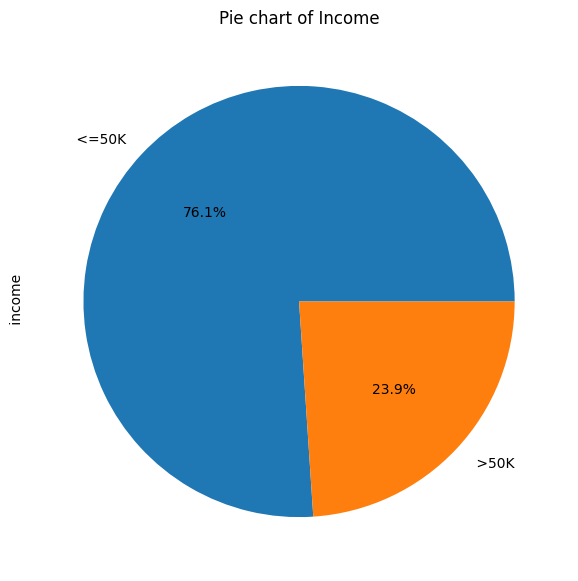

In [78]:
df[" income"].value_counts().plot.pie(autopct="%.1f%%",figsize=(7,7))
plt.title("Pie chart of Income")

**2.Individual features and their relationship with the target variable:**

a) occupation and Income:

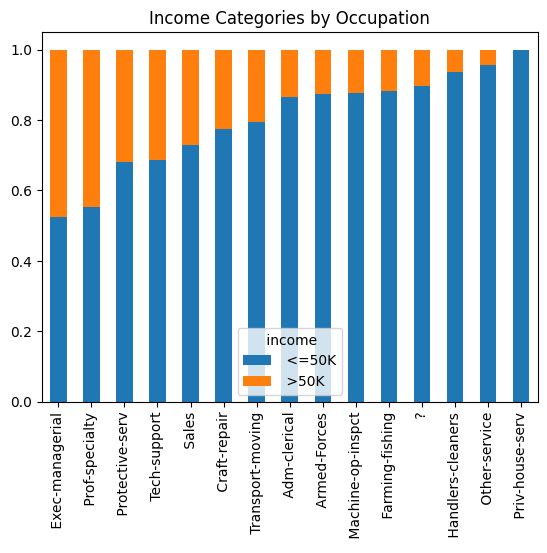

In [79]:
# Create a crosstab of occupation and income categories
pie = pd.crosstab(df[' occupation'], df[' income'])

# Calculate the percentage of each income category for each occupation
pie = pie.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
pie= pie.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
pie.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

b) Income distribution by Race and Sex

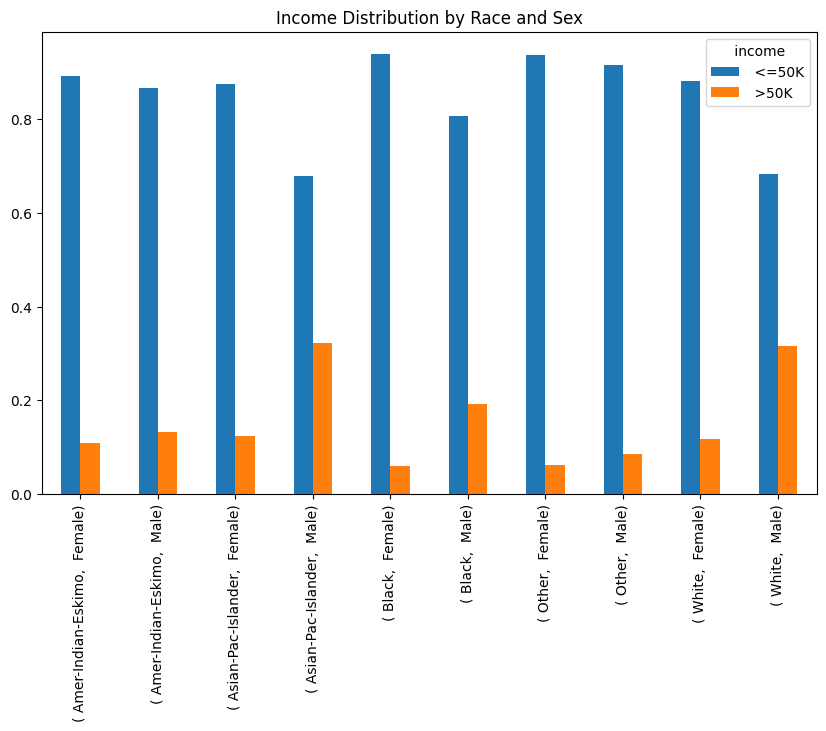

In [80]:
ct = pd.crosstab(index=[df[' race'], df[' sex']], columns=df[' income'], normalize='index')
ct.plot(kind='bar', figsize=(10, 6)) #create a grouped bar chart
plt.title('Income Distribution by Race and Sex')
plt.xlabel('')
plt.ylabel('')
plt.show()

c) Distribution of martial status:


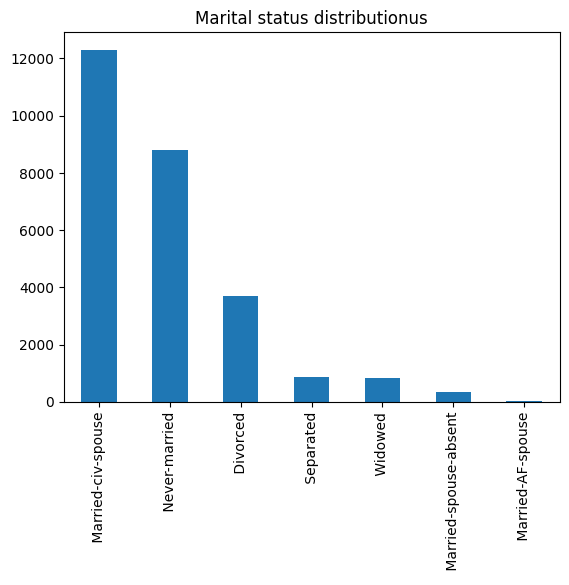

In [81]:
df[' marital-status'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('Marital status distributionus')
plt.show()

d) Relationship between martial status and Income

<Axes: xlabel=' income', ylabel=' marital-status'>

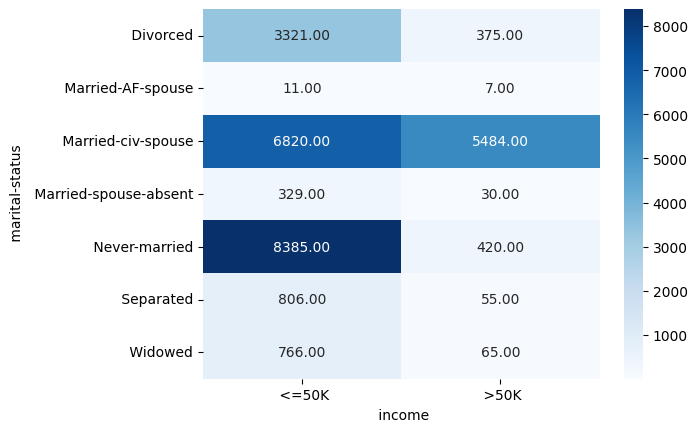

In [82]:
table = pd.crosstab(df[' marital-status'], df[' income'])
sns.heatmap(table, annot=True, fmt='.2f', cmap='Blues')

e)Distribution of income by age and hours worked per week:

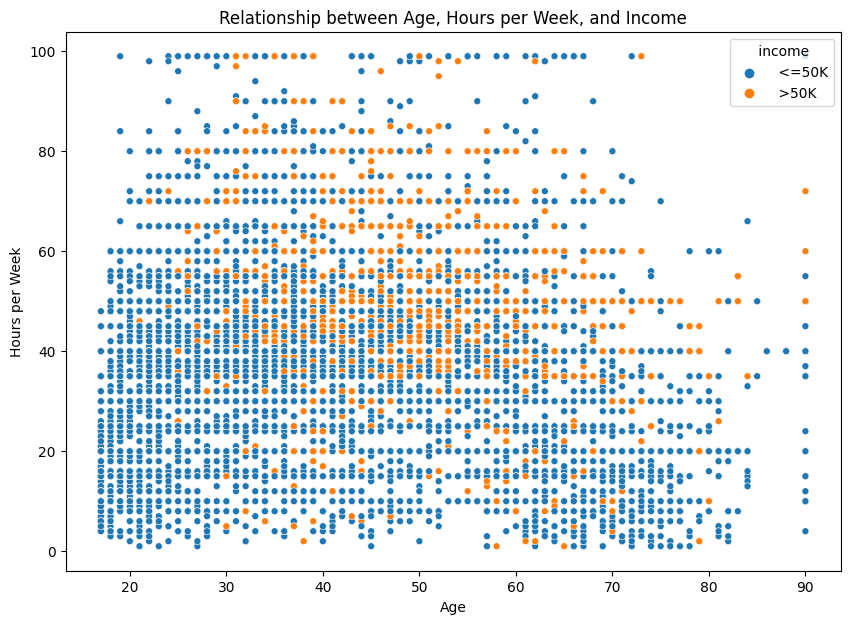

In [83]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x= "age", y=" hours-per-week", hue=" income", s=25)
plt.title("Relationship between Age, Hours per Week, and Income")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

f) Distribution of income by age and sex

<Axes: xlabel=' sex', ylabel='age'>

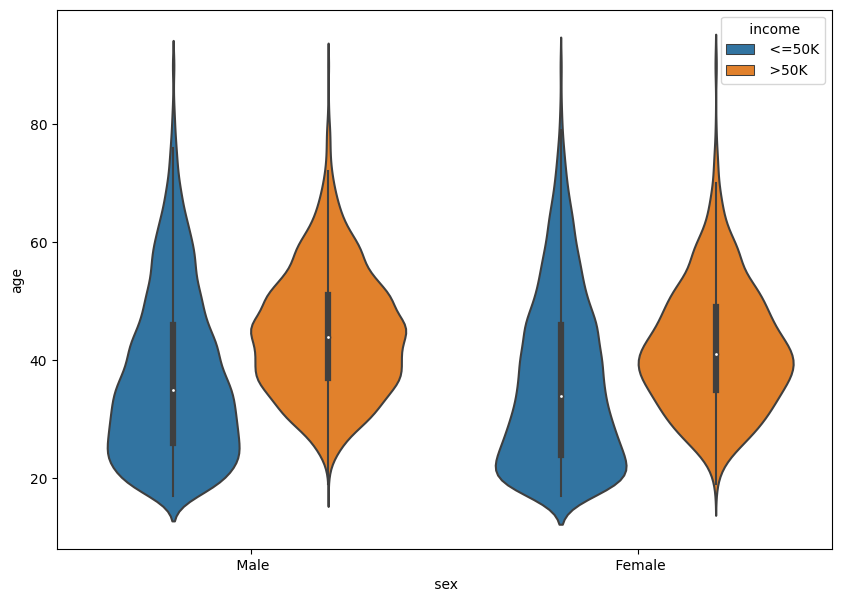

In [84]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df, x=' sex', y='age', hue=' income')

g) Distribution of each variable

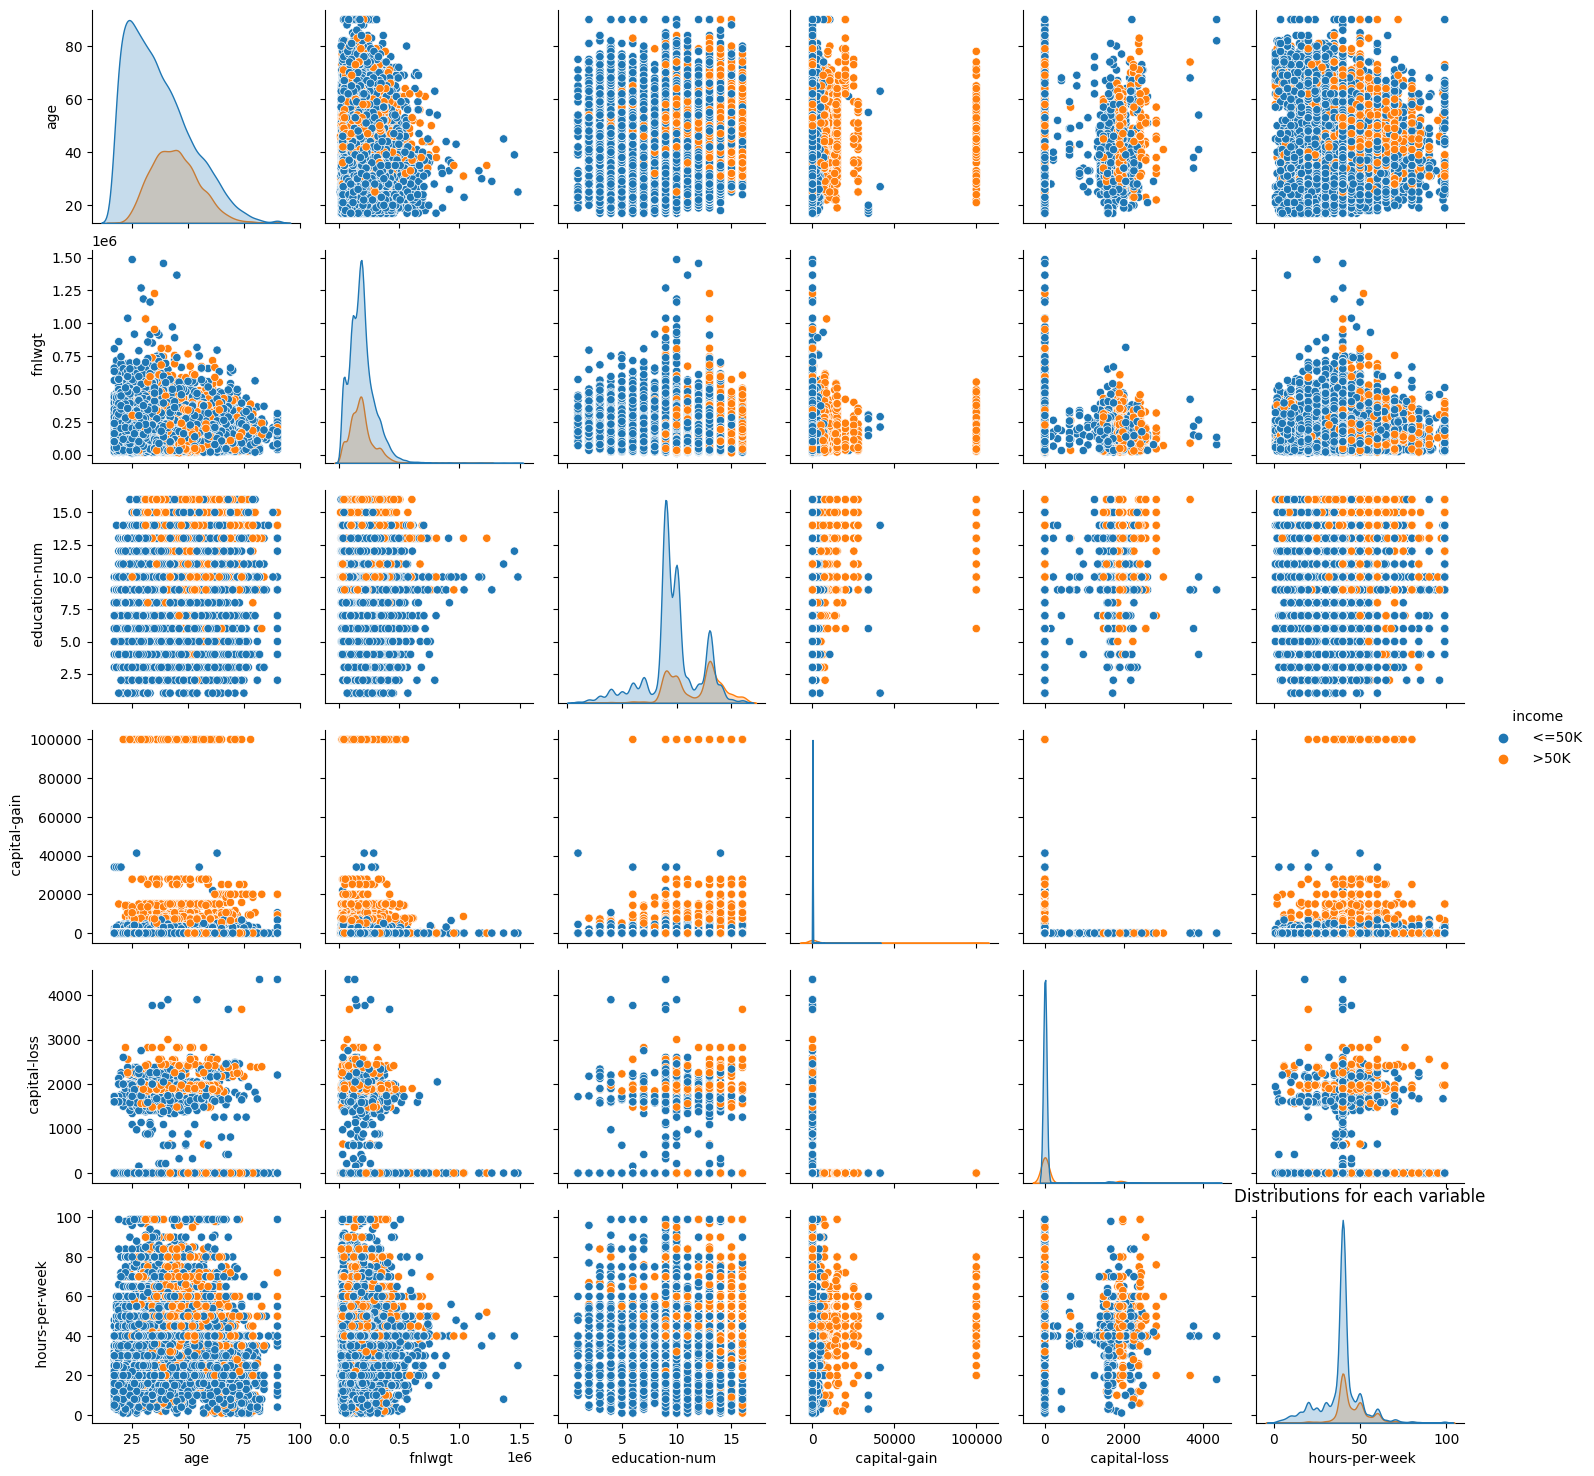

In [85]:
sns.pairplot(data=df, hue=" income")
plt.title('Distributions for each variable')
plt.show()

h) Checking Outliers

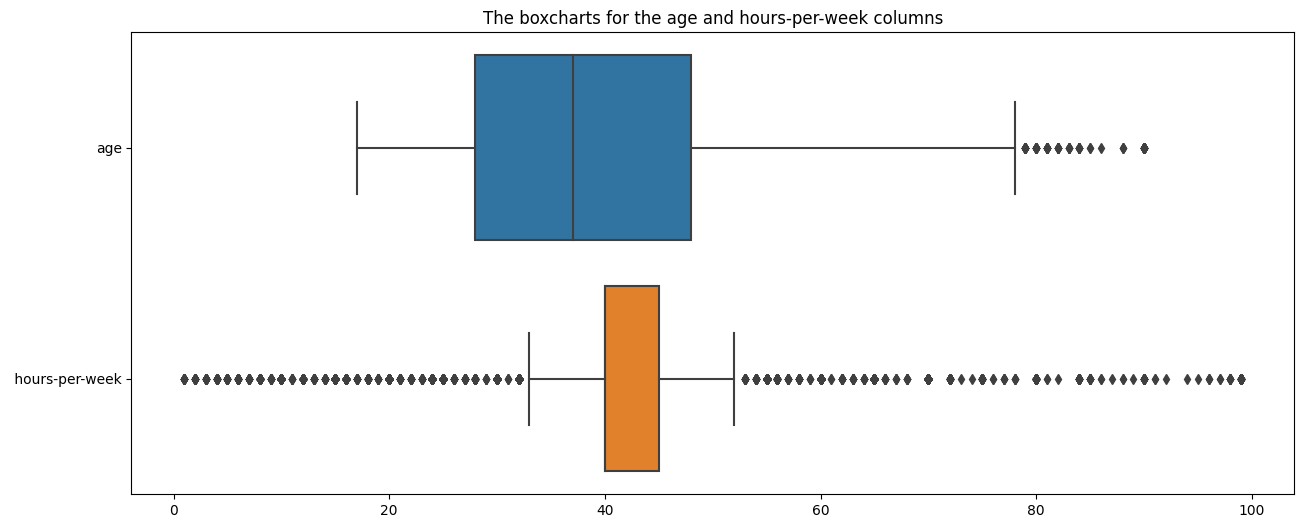

In [86]:
plt.figure(figsize=(15,6))
plt.title(f'The boxcharts for the age and hours-per-week columns')
sns.boxplot( data=df[['age', ' hours-per-week']], orient='h')
plt.show()

j) Capital gain and capital loss

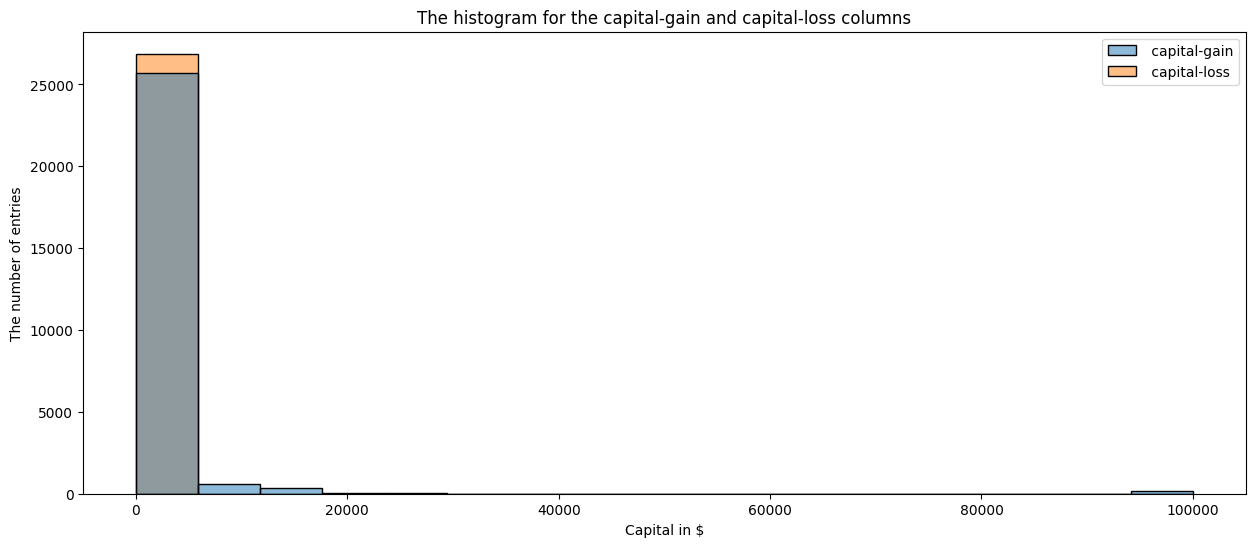

In [87]:
plt.figure(figsize=(15,6))
plt.title(f'The histogram for the capital-gain and capital-loss columns')
sns.histplot( data=df[[' capital-gain',' capital-loss']])
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

In [88]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

k)Distribution of Educational Qualification

<Axes: >

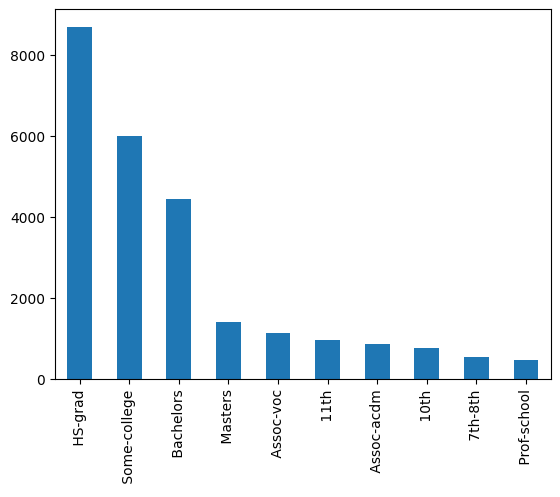

In [89]:
df[' education'].value_counts().head(10).plot.bar()

l) comparison between income and relationship

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

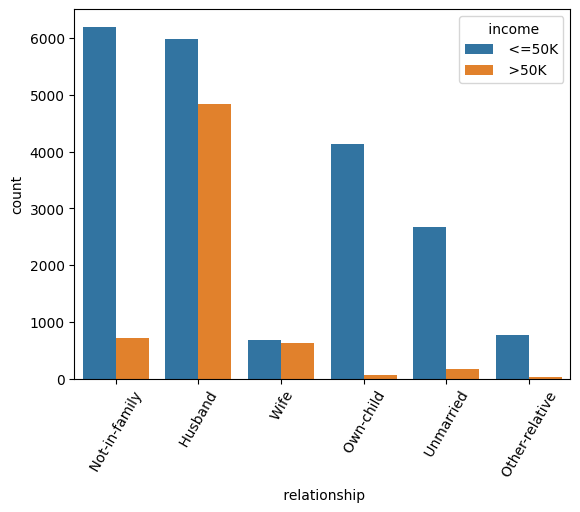

In [90]:
sns.countplot(data=df, x=" relationship", hue=" income")
plt.xticks(rotation=60)

Shape of the data

In [91]:
df.shape

(26874, 15)

In [150]:
df.dtypes

age                int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
 income            int64
dtype: object

In [151]:
df[" income"].value_counts()

0    20438
1     6436
Name:  income, dtype: int64

In [152]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000
mean,21.611520,3.869465,9130.452928,10.300588,9.084692,2.612711,6.572003,1.450287,3.668081,0.668937,6.351604,1.997879,39.349557,36.726613,0.239488
std,13.661717,1.455170,5272.095142,3.866333,2.564925,1.510788,4.236238,1.606791,0.846744,0.470605,22.814194,9.829221,12.099871,7.821922,0.426779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,4671.000000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,8991.500000,11.000000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,13493.750000,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,71.000000,8.000000,18817.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,116.000000,89.000000,93.000000,41.000000,1.000000


Checking for Null values

In [155]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [156]:
df.info

<bound method DataFrame.info of        age   workclass   fnlwgt   education   education-num   marital-status  \
0       22           7     2284           9              12                4   
1       33           6     2504           9              12                2   
2       21           4    12285          11               8                0   
3       36           4    13372           1               6                2   
4       11           4    16851           9              12                2   
...    ...         ...      ...         ...             ...              ...   
26869   11           1    15849           9              12                4   
26870   21           4     9075           7              11                0   
26871   36           4     1236          11               8                2   
26872   11           2     3346           9              12                0   
26873   25           4    12961          15               9                2   

       

In [157]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

**Getting the labels from the dataframe**

In [159]:
df = pd.get_dummies(df)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2284,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2504,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,12285,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,13372,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,16851,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,11,1,15849,9,12,4,13,1,2,0,0,0,39,39,0
26870,21,4,9075,7,11,0,3,1,4,1,0,0,39,39,0
26871,36,4,1236,11,8,2,14,0,4,1,0,46,39,39,1
26872,11,2,3346,9,12,0,10,1,4,1,0,0,39,39,0


In [160]:
x = df.drop(columns = [" income"])
y = df[" income"]

In [162]:
print(x.shape, y.shape)

(26874, 14) (26874,)


**1) Decision Tree Classifier**

⦁	Decision tree classifier is its ability to using different feature subsets and decision rules at different stages of classification.

⦁	 General decision tree consists of one root node, a number of internal and leaf nodes, and branches. Leaf nodes indicate the class to be assigned to a sample.


In [163]:

x= df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income']]
y=df[' income']

In [164]:
y = df[' income']
x = df.drop(' income', axis=1)

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 116)

In [166]:
model = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 7)

In [167]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8397618752325438

In [168]:
a= model.score(x_test,y_test)
a

0.8397618752325438

In [169]:
from sklearn import tree

[Text(0.6, 0.9, 'x[7] <= 0.5\ngini = 0.364\nsamples = 18811\nvalue = [14302, 4509]'),
 Text(0.4, 0.7, 'x[4] <= 11.5\ngini = 0.494\nsamples = 7574\nvalue = [4207, 3367]'),
 Text(0.3, 0.5, 'x[10] <= 76.5\ngini = 0.439\nsamples = 5264\nvalue = [3551, 1713]'),
 Text(0.2, 0.3, 'x[4] <= 6.5\ngini = 0.414\nsamples = 5008\nvalue = [3545, 1463]'),
 Text(0.1, 0.1, 'gini = 0.184\nsamples = 791\nvalue = [710, 81]'),
 Text(0.3, 0.1, 'gini = 0.441\nsamples = 4217\nvalue = [2835, 1382]'),
 Text(0.4, 0.3, 'gini = 0.046\nsamples = 256\nvalue = [6, 250]'),
 Text(0.5, 0.5, 'gini = 0.407\nsamples = 2310\nvalue = [656, 1654]'),
 Text(0.8, 0.7, 'x[10] <= 88.5\ngini = 0.183\nsamples = 11237\nvalue = [10095, 1142]'),
 Text(0.7, 0.5, 'x[7] <= 4.5\ngini = 0.148\nsamples = 10965\nvalue = [10085, 880]'),
 Text(0.6, 0.3, 'gini = 0.096\nsamples = 10116\nvalue = [9603, 513]'),
 Text(0.8, 0.3, 'gini = 0.491\nsamples = 849\nvalue = [482, 367]'),
 Text(0.9, 0.5, 'gini = 0.071\nsamples = 272\nvalue = [10, 262]')]

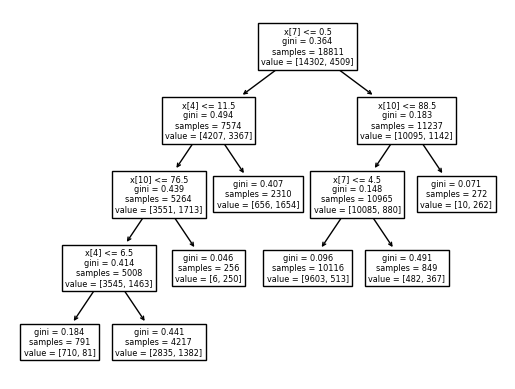

In [170]:
tree.plot_tree(model)

In [171]:
y_pred = model.predict(x)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
cm = confusion_matrix(y,y_pred)
cm

array([[19506,   932],
       [ 3375,  3061]])

<Axes: >

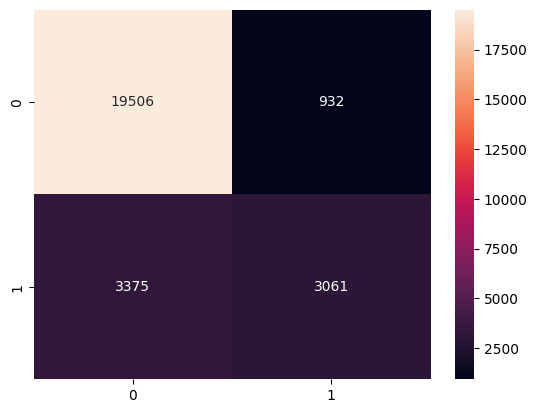

In [176]:
sns.heatmap(cm, annot = True, fmt = 'd')

**2) Random Forest Classifier Model**

⦁	Random Forest is a popular machine learning algorithm used for classification and regression tasks due to its high accuracy, robustness, feature importance, versatility, and scalability.

⦁	Random Forest reduces overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.


In [177]:

model4 = RandomForestClassifier(n_estimators=40)
model4.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [178]:
b = model4.score(x_train,y_train)
b

0.9994683961511881

In [179]:
y_pred5=model4.predict(x_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [180]:
y_test

9713     1
11526    0
16036    0
18881    0
7056     0
        ..
10817    0
3065     0
17119    0
818      0
6404     0
Name:  income, Length: 8063, dtype: int64

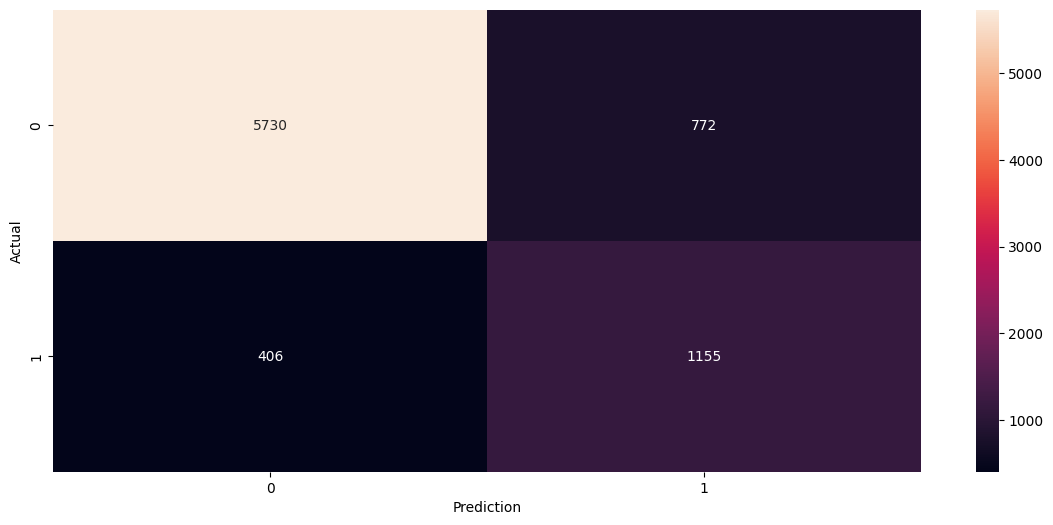

In [181]:
cm = confusion_matrix(y_pred5,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [182]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      6502
           1       0.60      0.74      0.66      1561

    accuracy                           0.85      8063
   macro avg       0.77      0.81      0.78      8063
weighted avg       0.87      0.85      0.86      8063



**3) Logistic Regression Classifier**

⦁	Logistic Regression is a statistical approach and a Machine Learning algorithm that is used for classification problems and is based on the concept of probability. It is used when the dependent variable (target) is categorical.


In [184]:

model3 = LogisticRegression()
model3.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
c = model3.score(x_train,y_train)
c

0.7891659135612142

In [186]:
y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
y_test

9713     1
11526    0
16036    0
18881    0
7056     0
        ..
10817    0
3065     0
17119    0
818      0
6404     0
Name:  income, Length: 8063, dtype: int64

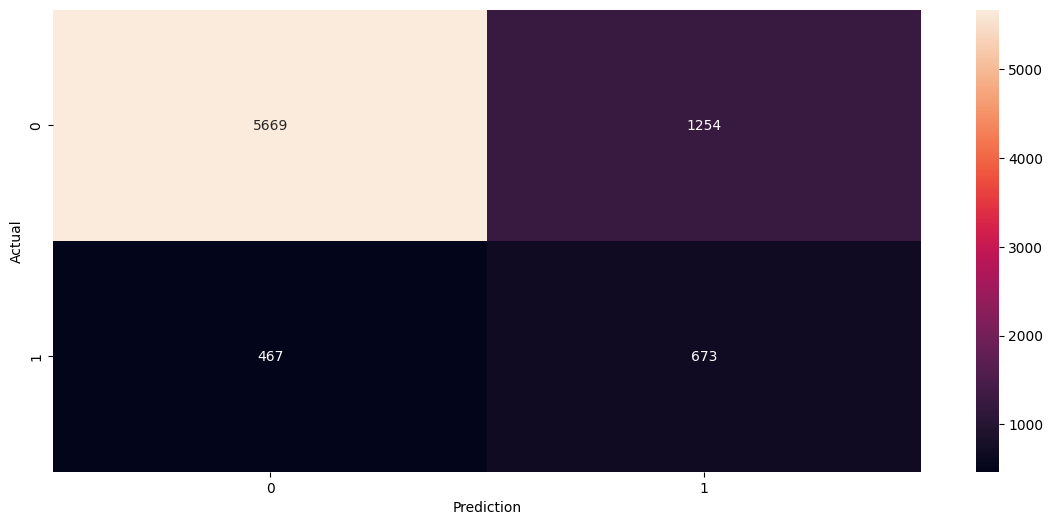

In [188]:
cm = confusion_matrix(y_pred3,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [189]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      6923
           1       0.35      0.59      0.44      1140

    accuracy                           0.79      8063
   macro avg       0.64      0.70      0.65      8063
weighted avg       0.84      0.79      0.81      8063



**4) Support Vector Classifier**

⦁	The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.


In [190]:
model2 = SVC()
model2.fit(x_train,y_train)

SVC()

In [191]:
d = model2.score(x_train,y_train)
d

0.7602998245707299

In [192]:
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
y_test


9713     1
11526    0
16036    0
18881    0
7056     0
        ..
10817    0
3065     0
17119    0
818      0
6404     0
Name:  income, Length: 8063, dtype: int64

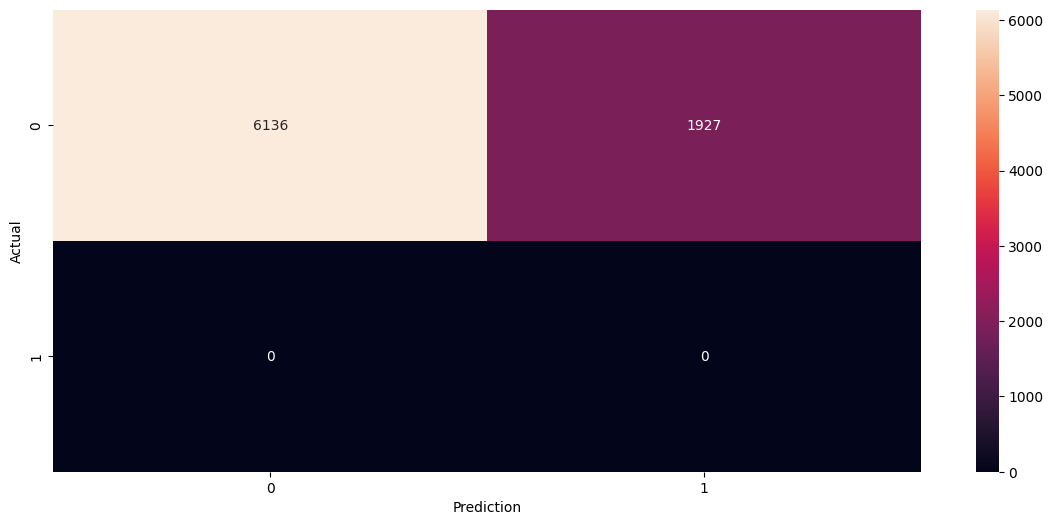

In [194]:
cm = confusion_matrix(y_pred2,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [195]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      8063
           1       0.00      0.00      0.00         0

    accuracy                           0.76      8063
   macro avg       0.50      0.38      0.43      8063
weighted avg       1.00      0.76      0.86      8063



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5) Multinomial Naive Bayes**

⦁	It is very useful to use on a dataset that is distributed multinomially
Multinomial Naive Bayes (MNB) is a popular machine learning algorithm for text classification problems that involve text data with discrete features such as word frequency counts

In [196]:
model1 = MultinomialNB()
model1.fit(x_train,y_train)

MultinomialNB()

In [197]:
e = model1.score(x_train,y_train)
e

0.6986869384934347

In [198]:
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 1, 0, ..., 0, 0, 0])

In [199]:
y_test

9713     1
11526    0
16036    0
18881    0
7056     0
        ..
10817    0
3065     0
17119    0
818      0
6404     0
Name:  income, Length: 8063, dtype: int64

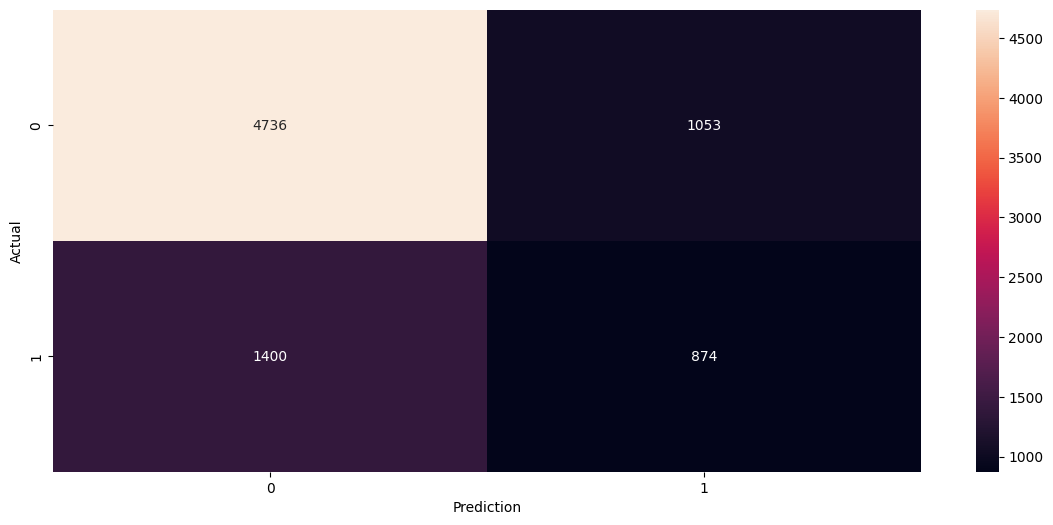

In [200]:
cm = confusion_matrix(y_pred1,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [201]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5789
           1       0.45      0.38      0.42      2274

    accuracy                           0.70      8063
   macro avg       0.61      0.60      0.61      8063
weighted avg       0.68      0.70      0.69      8063



**6) K-Nearest Neighbors Classifier**

⦁	It is commonly used for simple recommendation systems, pattern recognition, data mining, financial market predictions, intrusion detection, and more.
In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated

In [202]:

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x,y)
model.score(x,y)

0.8691300141400611

In [203]:
f=model.score(x,y)
f

0.8691300141400611

In [137]:
ss = StandardScaler()

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.78)

In [205]:
y_pred0 = model.predict(x_test)
y_pred0

array([1, 0, 0, ..., 0, 0, 0])

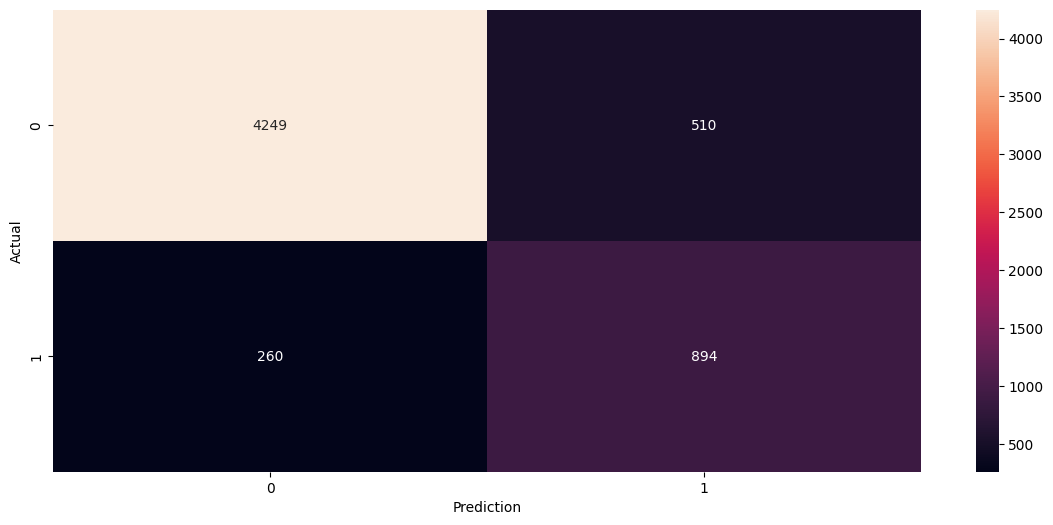

In [206]:
cm = confusion_matrix(y_pred0,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [207]:
print(classification_report(y_pred0,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4759
           1       0.64      0.77      0.70      1154

    accuracy                           0.87      5913
   macro avg       0.79      0.83      0.81      5913
weighted avg       0.88      0.87      0.87      5913



**7) Passive Aggressive Classifier**

⦁	This is very useful in situations where there is a huge amount of data, and it is computationally infeasible to train the entire dataset because of the sheer size of the data.


In [208]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [209]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(x_train,y_train)


PassiveAggressiveClassifier(max_iter=50)

In [210]:
g=model.score(x_train,y_train)
g

0.7623682076236821

In [211]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [212]:
y_test

21224    1
9651     0
11501    0
202      1
1089     0
        ..
10894    0
4294     0
9339     0
19676    0
23692    0
Name:  income, Length: 5913, dtype: int64

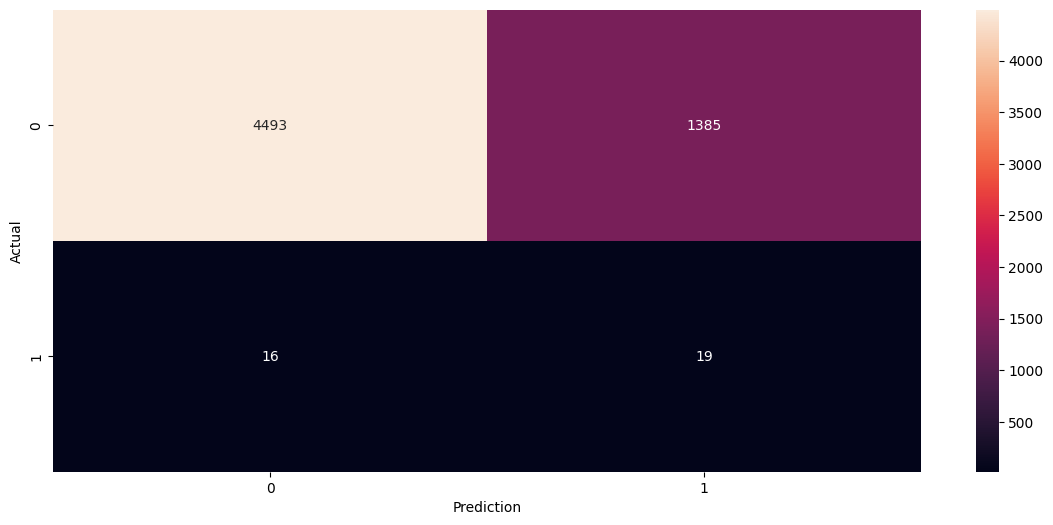

In [213]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [214]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87      5878
           1       0.01      0.54      0.03        35

    accuracy                           0.76      5913
   macro avg       0.50      0.65      0.45      5913
weighted avg       0.99      0.76      0.86      5913



**Comparing Accuracy of all Machine Learning Models**

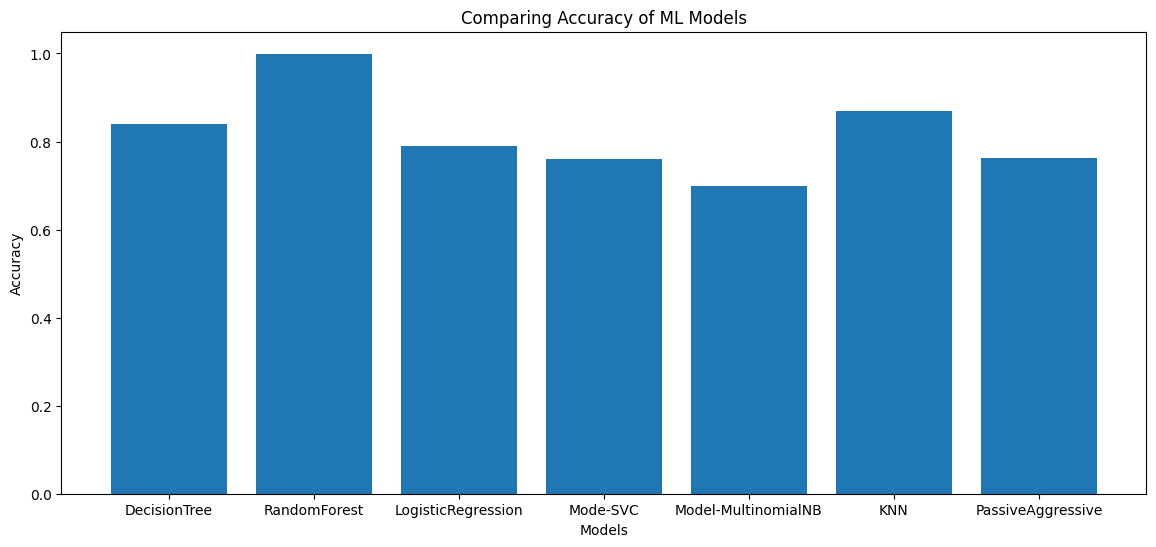

In [215]:
plt.figure(figsize=(14,6))
x=['DecisionTree','RandomForest','LogisticRegression','Mode-SVC','Model-MultinomialNB', 'KNN','PassiveAggressive']
y=[a,b,c,d,e,f,g]
plt.title('Comparing Accuracy of ML Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.bar(x,y)
plt.show()

**CONCLUSION**

The results obtained above can be used as a standard point of reference for other comparative studies done in the field of predicting values from census data. This comparative study can further be used as a basis for improving the present classifiers and techniques resulting in making better technologies for accurately predicting income level of an individual.

The aim of today’s research in the field of data science is to build systems and algorithms to extract knowledge from data. This research can supplement the present capabilities of methods and reduce any errors, thereby making a contribution in the field of data mining from historic census data